In [36]:
# tsvを読み込む
import sys
import enum
f = open("test.tsv", 'r')
lines = f.readlines()
f.close()
print("getsizeof : {}".format(sys.getsizeof(lines))) # 2857936 = 2.7MBくらい

# ヘッダ行を取り除く
lines.pop(0)

# インデックスの定義
class I(enum.IntEnum):
    phi1       = 0
    PHI        = 1
    phi2       = 2
    x          = 3
    y          = 4
    IQ         = 5
    CI         = 6
    Fit        = 7
    Grain_ID   = 8
    edge       = 9
    phase_name = 10


getsizeof : 2857936


In [37]:
# tsvからグラフ描画に必要なデータのみ抽出
import numpy as np
X , Y , Z = np.empty(0), np.empty(0) ,np.empty(0)
n = 0
for line in lines:
    n = n + 1
    if n % 1000 != 1:
        continue # 1/1000にサンプリング
    columns = line.strip().split(sep="\t")

    X = np.append(X, float(columns[I.x]))
    Y = np.append(Y, float(columns[I.y]))
    Z = np.append(Z, float(columns[I.Grain_ID])) # z軸 いろいろ お試し I.phi1, I.IQ, I.CI など。

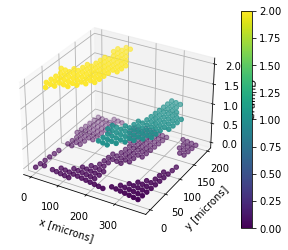

In [39]:
# 3D scatterplot
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# label
ax.set_xlabel("x [microns]")
ax.set_ylabel("y [microns]")
ax.set_zlabel("Grain ID")

# show
scatter = ax.scatter(X, Y, Z, c=Z)
plt.colorbar(scatter)
plt.show()